# Ændre størrelsen på billeder

Billederne i Flora Danica datasættet er store, så måske vil du synes, det vil være smart med et script, som kan ændre størrelsen på billederne. 

Scriptet viser, hvordan man kan ændre størrelsen på tif-filer og samtidigt bevare størrelsesforholdet. Det henter tiff filerne fra en mappe og gemmer dem som tiff filer i en anden (source_folder -- > destination_folder). Det sikrer, at den anden mappe findes, og det tager op til et specificeret antal af filer fra første mappe.

In [1]:
import os
from PIL import Image

def resize_and_store_tiff_files(source_folder, destination_folder, new_size=(100, 100), num_files=10):
    # Sikrer at mappen findes
    os.makedirs(destination_folder, exist_ok=True)

    # Lav en liste af alle tiff filerne
    tiff_files = [f for f in os.listdir(source_folder) if f.lower().endswith('.tif') or f.lower().endswith('.tiff')]

    # Kør kun specificeret antal fier (num_files=10)
    for tiff_file in tiff_files[:num_files]:
        # Skrive stien
        source_path = os.path.join(source_folder, tiff_file)
        destination_path = os.path.join(destination_folder, tiff_file)

        # Åben, ændre større og gem billedet
        with Image.open(source_path) as img:
            # Bevar størrelsesforholdet
            img.thumbnail(new_size, Image.LANCZOS)
            img.save(destination_path, "TIFF")


 
source_folder = r'mekuni_flora_danica_data/sample_data/'
destination_folder = r'mekuni_flora_danica_data/floradanica_resized_images'
resize_and_store_tiff_files(source_folder, destination_folder, new_size=(150, 150))

## Vis billeder i en Jupyter notebook

### Et enkelt billede

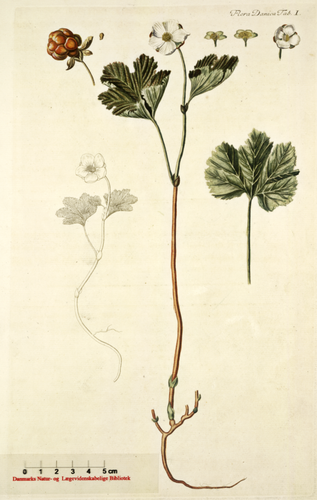

In [2]:
# Indlæs et billede fra en fil - husk at denne sti passer til dette script
image_path = r'mekuni_flora_danica_data/floradanica_mini_sample_set/floradanica_0001.tif'  
image = Image.open(image_path)

# Vis billedet i en Jupyter notebook
display(image)

### Flere billeder

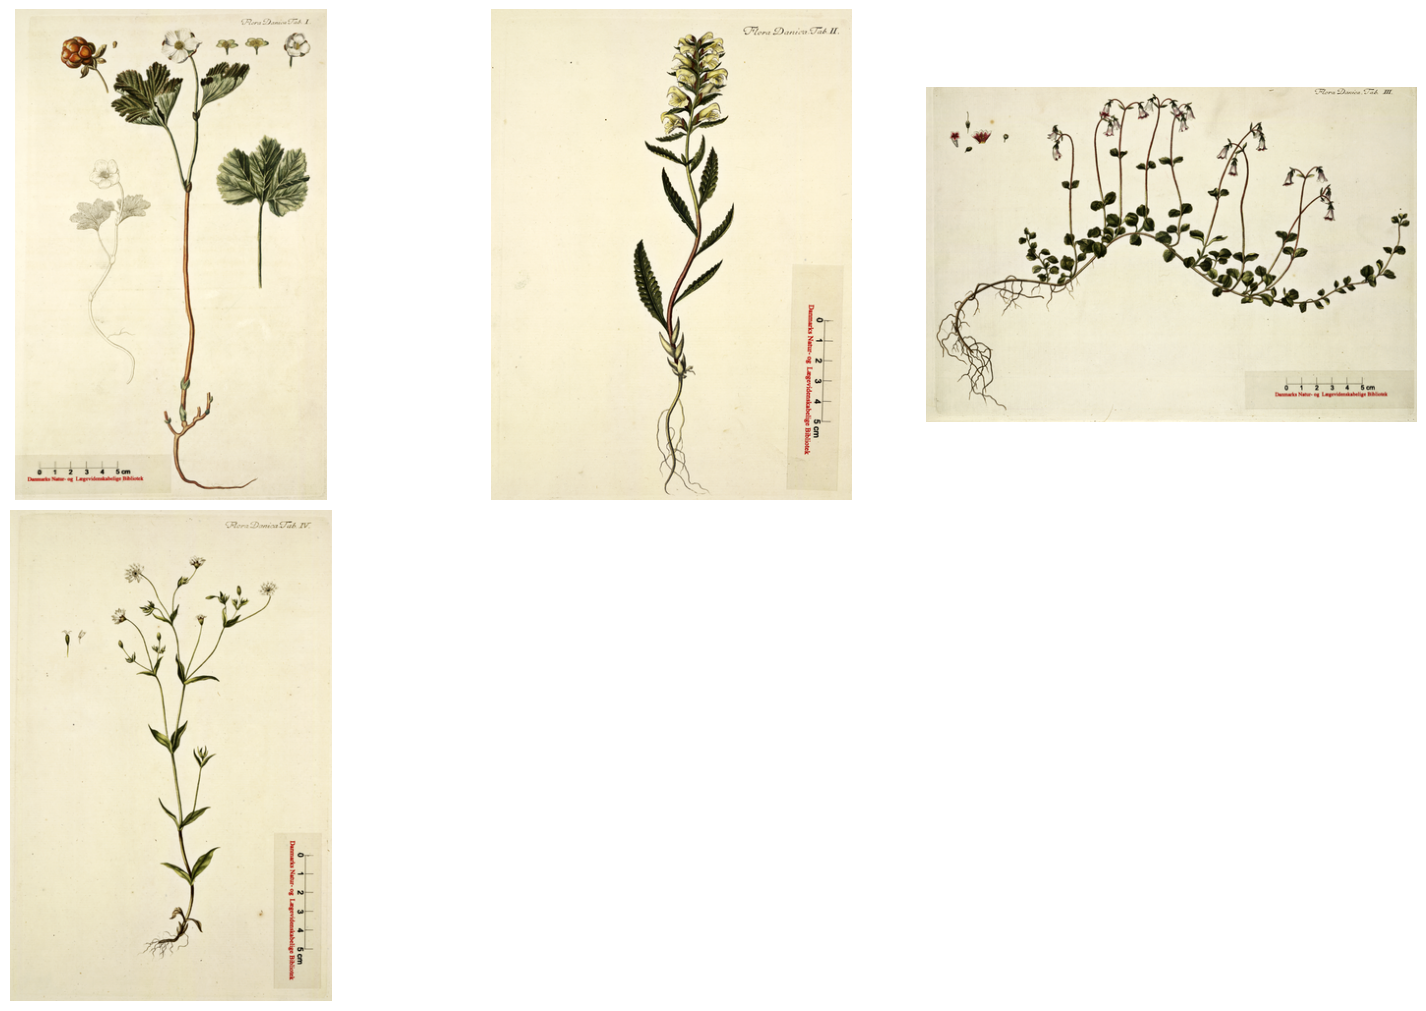

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Skriv stien til mappen med billedr og lav en liste med filerne
image_dir = r'mekuni_flora_danica_data/floradanica_mini_sample_set/'  # Replace with your image directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.tif'))]

# Vi de første 6 billeder (eller tre, hvis det passer bedre)
image_files = image_files[:4]

# Lav en liste for at holde styr på billederne
images = []

# Indlæs billederne
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    images.append(img)

# Opsæt et mønster i kolonner
num_images = len(images)
cols = 3  # Antal kollonner
rows = (num_images + cols - 1) // cols  # Beregn for mange rækker, der er brug for 

# Byg figur og mønster
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Vis billederne - brug 'off' for at skjule rammer omkring subsplots  
for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis('off')  # Hide axes ticks

# Brug 'off' til at skjule ubrugte subplots, altså hvis antal af billeder er mindre end række gange kolonner)
for ax in axes.flatten()[num_images:]:
    ax.axis('off')

# Show the grid of images
plt.show()